In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV', 'AGG']

In [2]:
quote = Quote(symbols, 60)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-02 to 2019-07-01 - 70'

In [27]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 2) & (stat['21-mean'] > 1.2) & (stat['21-shrp'] > 2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
BNDX,21,1.809860,0.252247,6.514212,0.193595
BNDW,21,1.853094,0.264831,6.367927,0.254071
BIV,21,2.351475,0.429181,5.090646,0.379729
BND,21,1.860168,0.347052,4.879674,0.289154
AGG,21,1.856870,0.349615,4.834465,0.287234
BLV,21,4.086538,0.823056,4.762581,0.997841
SPIB,21,1.694725,0.337212,4.531445,0.202545
VCIT,21,2.405503,0.512463,4.368776,0.378426
IGIB,21,2.300247,0.523822,4.073102,0.379743


In [47]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, sr=.4)

['BNDX'] -1.4469658415636135 0.8 0.038718976044479825 6.514212044020233
['BNDX', 'BNDW'] -1.7222027223492398 0.8094584279345951 0.04476657320202496 6.441069308714649
['BNDX', 'IEI'] -1.7884814033682637 0.2546674207115007 0.05431300101969685 5.243654562748652
['BNDX', 'IEF'] -1.8130072650664744 0.19595526916684558 0.06879653818535025 5.1943976810466745


['BNDX', 'IEF']

In [49]:
quote.setup_mask(['BNDX', 'IEF'])
quote.find_optimal_ratio(21)

({'BNDX': 0.85, 'IEF': 0.15}, 1.9406, 0.2523, 7.0324)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,21.0,1.940635,0.253548,1.467257,1.806306,1.834578,2.091184,2.575638,6.996580,0.239388
BNDX,21.0,1.809860,0.252247,1.443262,1.674564,1.745740,1.870649,2.403144,6.514212,0.193595
IEF,21.0,2.687510,0.650610,0.913545,2.473781,2.725533,3.104717,3.886490,3.874583,0.494371


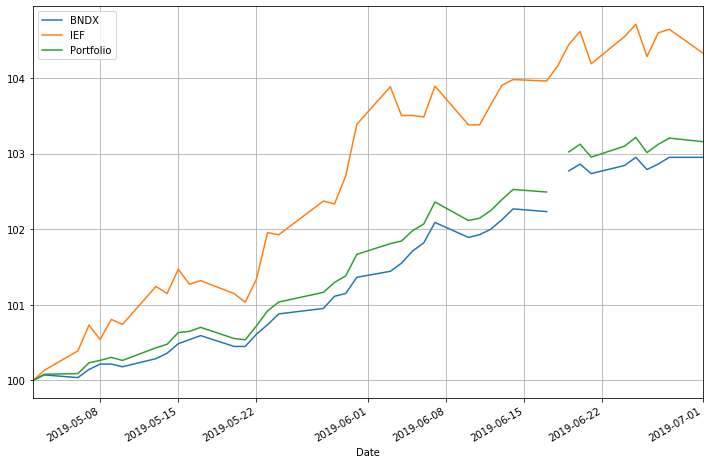

In [50]:
%pylab inline
quote.setup_mask(['BNDX', 'IEF'])
quote.graph(21, {'BNDX': 0.85, 'IEF': 0.15})